In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import ast
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import MultiLabelBinarizer

Leer datos

In [2]:
df = pd.read_csv('../../data/codeforce_raw_data.csv')

### Exploración de datos

Exploración inicial de los datos

In [3]:
print(df.shape)
print(df.info())
print(df.head())

(7968, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7968 entries, 0 to 7967
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    7968 non-null   object 
 1   time_limit    7968 non-null   object 
 2   memory_limit  7968 non-null   object 
 3   input_file    7968 non-null   object 
 4   output_file   7968 non-null   object 
 5   description   7968 non-null   object 
 6   tags          7968 non-null   object 
 7   points        5600 non-null   float64
 8   rating        7859 non-null   float64
dtypes: float64(2), object(7)
memory usage: 560.4+ KB
None
  Unnamed: 0 time_limit   memory_limit input_file output_file  \
0     1846/F   1 second  256 megabytes  standard    standard    
1     1847/D  2 seconds  256 megabytes  standard    standard    
2    1846/E2  2 seconds  256 megabytes  standard    standard    
3    1846/E1  2 seconds  256 megabytes  standard    standard    
4     1846/C   1 second  25

Eliminar valores nulos y problemas sin tags


In [4]:
df.isnull().sum()
new_df = df.dropna()  # Ejemplo simple para eliminar filas con valores nulos

print(new_df.shape)

df = df.drop(columns=['points','rating'])
df = df.drop_duplicates()
df = df[df['tags'].notna()]

print(df.shape)

(5566, 9)
(7968, 7)


Análisis de Frecuencia de los Tags

In [5]:
tags = df['tags'].apply(ast.literal_eval)  # Convertir las listas de texto a listas reales
all_tags = [tag for sublist in tags for tag in sublist]
tag_counts = Counter(all_tags)

print(tag_counts.most_common())

[('implementation', 2392), ('math', 2359), ('greedy', 2302), ('dp', 1731), ('data structures', 1429), ('constructive algorithms', 1414), ('brute force', 1368), ('graphs', 890), ('sortings', 869), ('binary search', 862), ('dfs and similar', 776), ('trees', 663), ('strings', 617), ('number theory', 613), ('combinatorics', 543), ('bitmasks', 457), ('two pointers', 438), ('geometry', 344), ('dsu', 292), ('*special', 247), ('shortest paths', 231), ('divide and conquer', 226), ('probabilities', 200), ('interactive', 173), ('hashing', 172), ('games', 163), ('flows', 123), ('matrices', 102), ('fft', 80), ('string suffix structures', 78), ('graph matchings', 76), ('ternary search', 46), ('meet-in-the-middle', 43), ('expression parsing', 32), ('2-sat', 23), ('chinese remainder theorem', 16), ('schedules', 8)]


Detectar idiomas del los problemas

In [6]:
def detect_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return "unknown"

# Detectar el idioma de cada problema
df['language'] = df['description'].apply(detect_language)
df = df[df['language'] != "unknown"]

print(df.shape)

(7968, 8)


Guardar el DataFrame

In [7]:
# Guardar el DataFrame en un archivo CSV
df.to_csv('../../data/codeforce_raw_cleaned_data.csv', index=False)

### Análisis de los datos

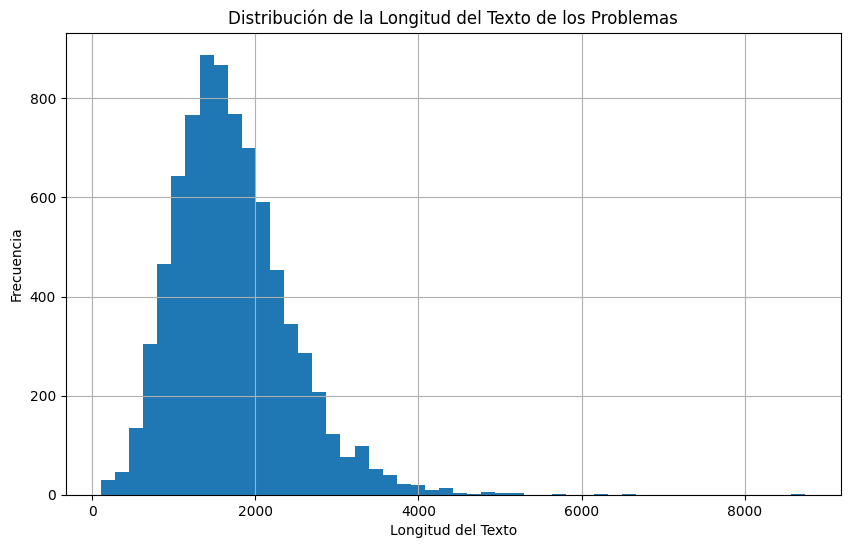

In [8]:
df['text_length'] = df['description'].apply(len)
df['text_length'].hist(bins=50, figsize=(10, 6))
plt.title('Distribución de la Longitud del Texto de los Problemas')
plt.xlabel('Longitud del Texto')
plt.ylabel('Frecuencia')
plt.show()

Gráfico de Barras de Frecuencia de Etiquetas

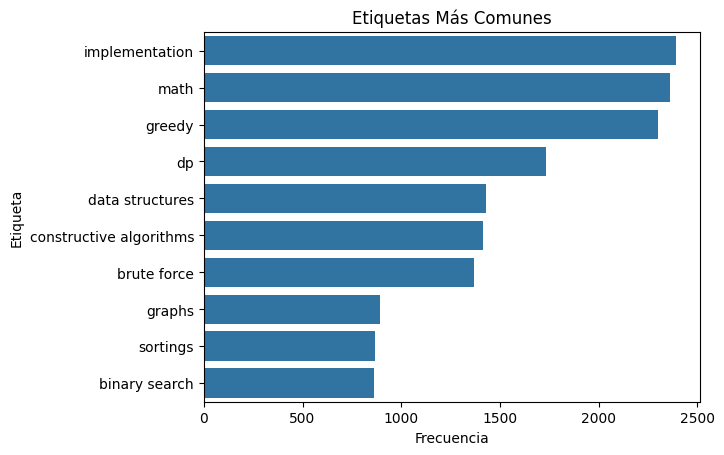

In [9]:
top_tags = pd.DataFrame(tag_counts.most_common(10), columns=['tag', 'count'])
sns.barplot(x='count', y='tag', data=top_tags)
plt.title('Etiquetas Más Comunes')
plt.xlabel('Frecuencia')
plt.ylabel('Etiqueta')
plt.show()

Gráfico de la Distribución de Idiomas

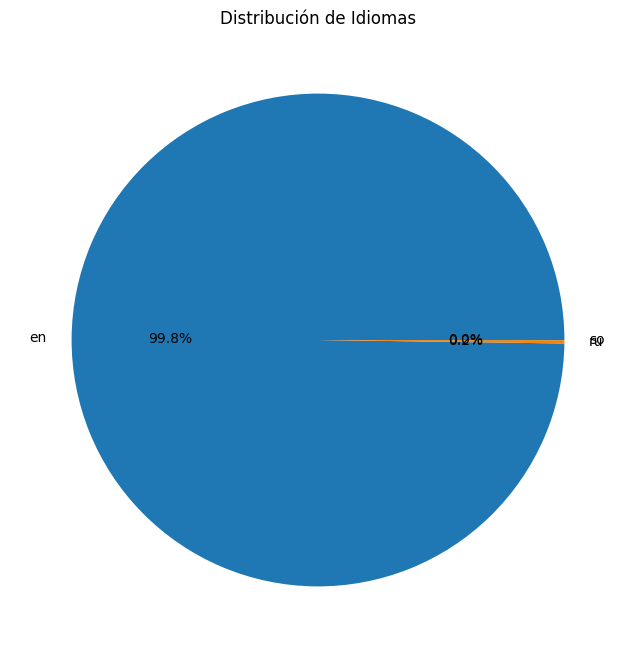

In [10]:
language_counts = df['language'].value_counts()
language_counts.plot.pie(autopct='%1.1f%%', figsize=(8, 8))
plt.title('Distribución de Idiomas')
plt.ylabel('')
plt.show()

Nube de Palabras del Texto de los Problemas

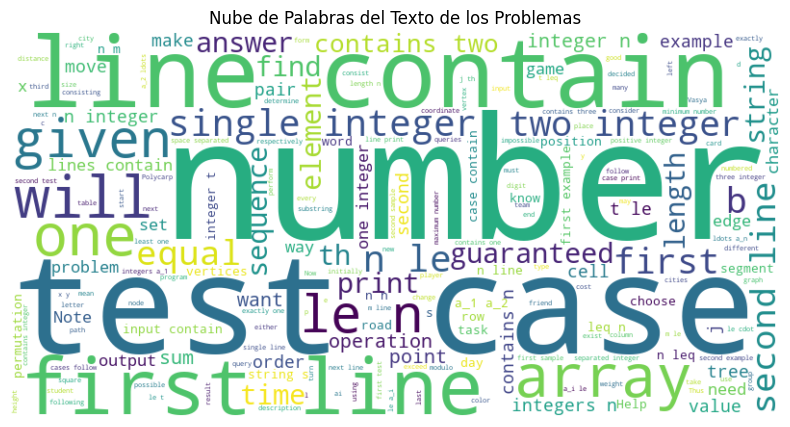

In [11]:
text = ' '.join(df['description'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras del Texto de los Problemas')
plt.show()

Matriz de Correlación de la Presencia de Etiquetas

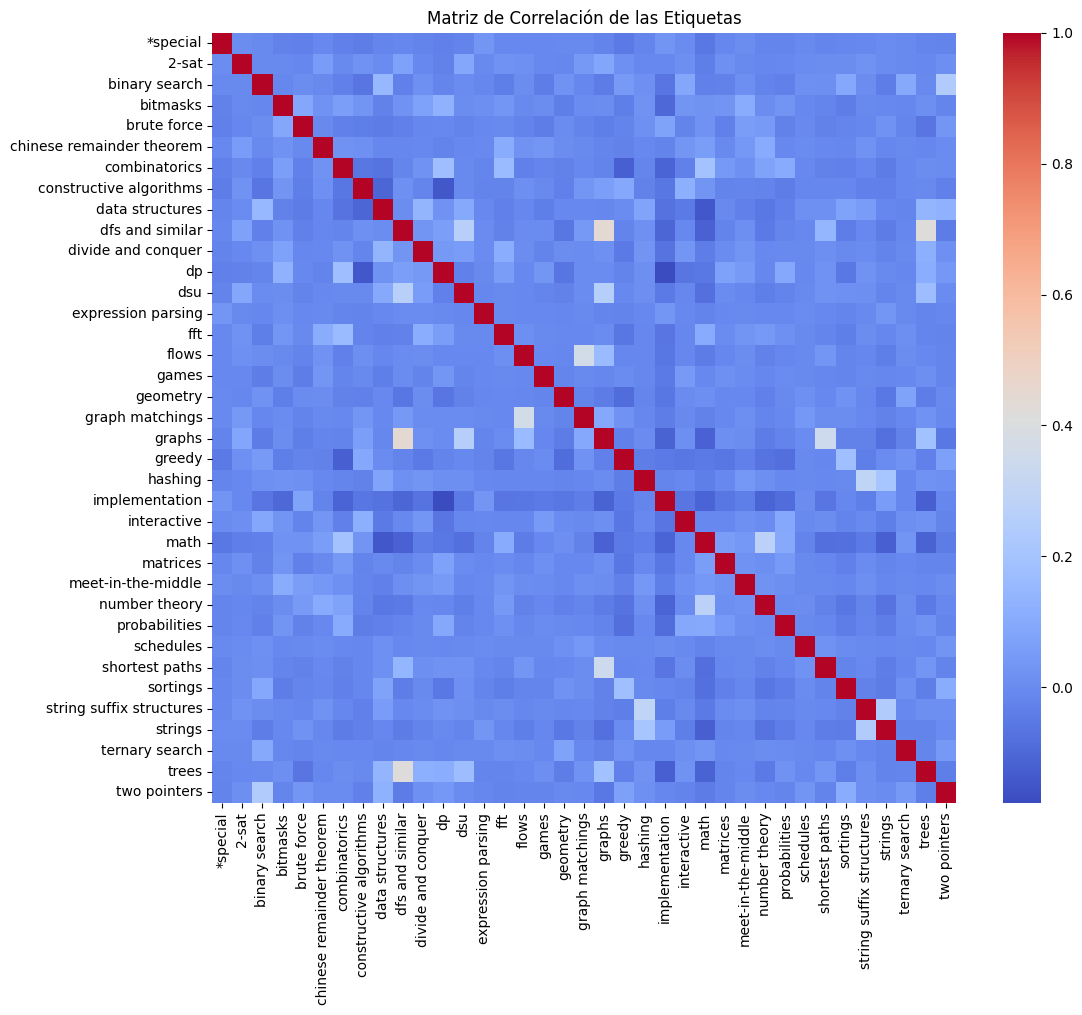

In [12]:
mlb = MultiLabelBinarizer()
tag_matrix = mlb.fit_transform(df['tags'].apply(ast.literal_eval))

# Matriz de correlación de la presencia de etiquetas
tag_correlation = pd.DataFrame(tag_matrix, columns=mlb.classes_).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(tag_correlation, cmap='coolwarm', annot=False)
plt.title('Matriz de Correlación de las Etiquetas')
plt.show()